In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
G = 6.67408 * 10**(-11) # m3 kg-1 s-2

In [5]:
def GravitationalForce(m1, m2, r):
    #Note that F has a direction.
    #Since v=vx+vy+vz, a=ax+ay+az etc
    #as long as we work in vectors we dont have to seperatly
    #care about direction. The inner product helps :D
    global G
    F = (G*m1*m2) / float(np.inner(r, r))
    direction=r/float(np.sqrt(np.inner(r,r)))
    F = np.inner(F,direction)
    return F, direction

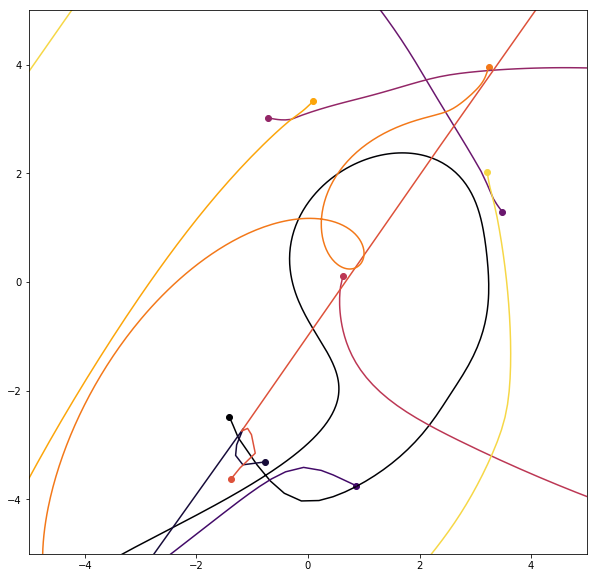

In [22]:
class PointMass(object):
    
    def __init__(self, location=[0,0,0], v=[0.,0.,0.,], a=0., vector=[1.,0.,0.,], m=0.):
        self.location_xyz = np.array(location)
        self.velocity     = v
        self.acceleration = a
        self.mass         = m
        self.history_x    = []   #This keeps track of each xyz-coordinate the pointMass went throug
        self.history_y    = []   #This is for plotting purposes
        self.history_z    = []


def calculateAV(massUpdate, otherMasses):
    acceleration= np.array([0.,0.,0.])
    velocity    = np.array([0.,0.,0.])
    for otherMass in otherMasses:
        distance_vector = otherMass.location_xyz - massUpdate.location_xyz
        a, e = GravitationalForce(otherMass.mass, massUpdate.mass, distance_vector )
        acceleration += a
        velocity += a*stepUnit
        
    return acceleration, velocity

def updatePointMass(mass, a, v):
    mass.history_x.extend([mass.location_xyz[0]])
    mass.history_y.extend([mass.location_xyz[1]])
    mass.history_z.extend([mass.location_xyz[2]])
    mass.acceleration = a
    mass.velocity     = mass.velocity+v * stepUnit
    mass.location_xyz = mass.location_xyz + mass.velocity * stepUnit
        
        

nrMasses = 10
masses = []
steps = 2000
stepUnit = 0.001 #second
upperLim = 4
lowerLim = -4



counter=0.
#Create n=nrMasses new instances of a class PointMass, each with random mass, location and velocity
while counter < nrMasses:
    newMass = PointMass(m=random.uniform(100000000, 1000000000), \
                        location=[random.uniform(lowerLim, upperLim), random.uniform(lowerLim,upperLim), 0.],\
                        v=[random.uniform(-.5, .5), random.uniform(-.5,.5), 0.])
    masses.extend([newMass])
    counter+=1
    
#Create a colourmap for the number of masses
colourMap = plt.get_cmap('inferno')
nColours  = len(masses)
mycolours = [colourMap(x) for x in np.linspace(0,1,nColours+1)]




fig, axes = plt.subplots(1,1, figsize=(10,10))

#Plot the starting point of each mass with a dot
for nrm, mass in enumerate(masses): 
    axes.scatter(mass.location_xyz[0], mass.location_xyz[1], c=mycolours[nrm])
    
nr =0 #Counter for the number of steps taken in the while loop.
while nr < steps:
    nr +=1
    accelerations = []
    velocities    = []
    #First calcultate the effect of all masses on the point mass of interest
    for nrm, mass in enumerate(masses):
        otherMasses      = list(masses)
        del otherMasses[nrm] #other masses is list minus the 
                             #mass we arew looking at.
                             #make it into temperary seperate 
                             #list else we empty [masses]
        a, v = calculateAV(mass, otherMasses)
        accelerations.append(a)
        velocities.append(v)
    #now update the velocity and direction of each mass
    for nrm, mass in enumerate(masses):
        updatePointMass(masses[nrm], accelerations[nrm] , velocities[nrm])
      

    
      
for nrm , mass in enumerate(masses):
    axes.plot(mass.history_x, mass.history_y, c=mycolours[nrm])

axes.set_xlim(-5,5)
axes.set_ylim(-5,5)
plt.show()

Could do fancier method where, instead of using the location at the end of each timestep to calculate
the new acceleration due to gravity, I use the weighted average location or half-way point instead.